# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

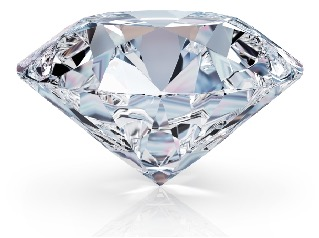

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DIAMONDS_DATASET = "./diamonds_good.csv"

In [4]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [5]:
df.head(10)

carat        cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23      Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
5    NaN  Very Good     J    VVS2   62.8   57.0  336.0  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0  336.0  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0  337.0  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0  337.0  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0  338.0  4.00  4.05  2.39

In [6]:
df.tail()

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

In [7]:
df.sample(3)

carat      cut color clarity  depth  table    price   'x'   'y'   'z'
6589    1.06  Premium     E     SI1   59.2   60.0   4078.0  6.64  6.60  3.92
2152    0.73    Ideal     G    VVS2   62.2   55.0   3127.0  5.77  5.74  3.58
23964   1.70    Ideal     I     VS1   60.1   57.0  12099.0  7.80  7.77  4.68

## Исследование данных

Размер датасета

In [8]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [10]:
df.describe()

carat         depth         table         price           'x'  \
count  53442.000000  52950.000000  53940.000000  53940.000000  53940.000000   
mean       0.797561     61.749422     57.457184   3932.799722      5.731157   
std        0.473534      1.431558      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                'y'           'z'  
count  53935.000000  53940.000000  
mean       5.734469      3.538734  
std        1.142125      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [11]:
df.describe(include='object')

cut  color clarity
count   53940  53940   53940
unique      6      7       8
top     Ideal      G     SI1
freq    21524  11292   13065

In [12]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53442.000000  53940  53940   53940  52950.000000  53940.000000   
unique           NaN      6      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21524  11292   13065           NaN           NaN   
mean        0.797561    NaN    NaN     NaN     61.749422     57.457184   
std         0.473534    NaN    NaN     NaN      1.431558      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price           'x'           'y'           'z'  
count   53940.000000  53940.000000  53935.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734469      3.538734  
std      3989.439738      1.121761      1.142125      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

In [13]:
df.duplicated().sum()

np.int64(135)

In [14]:
# df[условие фильтрации]

In [15]:
df[df.duplicated()]

carat    cut color clarity  depth  table   price   'x'   'y'   'z'
1005    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0  3105.0  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...     ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0  1919.0  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0  2093.0  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0  2130.0  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0  2203.0  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0  2579.0  5.21  5.18  4.09

[135 rows x 10 columns]

In [16]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [17]:
df.reset_index(inplace=True, drop=True)

df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

In [18]:
df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

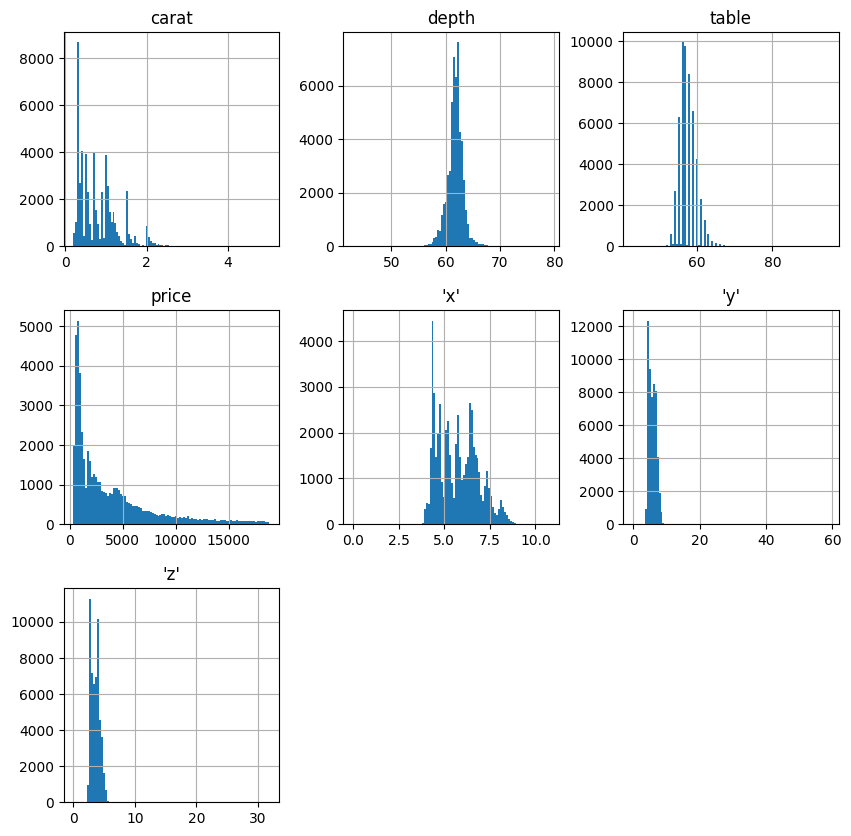

In [19]:
df[["carat","depth","table","price","'x'","'y'","'z'"]].hist(bins=100, figsize=(10,10));

In [20]:
median_carat = df['carat'].median()

df.fillna({'carat': median_carat}, inplace=True)

In [21]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

/tmp/ipykernel_6297/2155475674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)


### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [22]:
median_y = df['\'y\''].median()
print("median_y = ", median_y)

median_y =  5.71


In [23]:
df['\'y\''] = df['\'y\''].fillna(median_y)

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

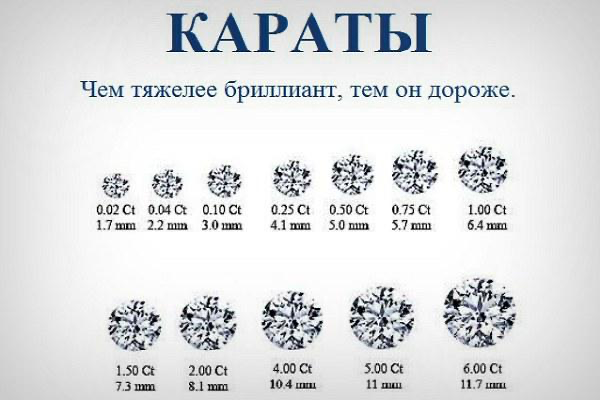

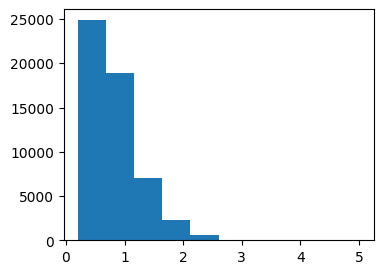

In [24]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

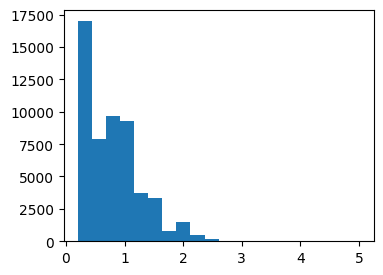

In [25]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [26]:
df.carat.min(), df.carat.max()

(np.float64(0.2), np.float64(5.01))

Сколько мелких бриллиантов в датасете?

In [27]:
len(df[df.carat < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [28]:
100 * len(df[df.carat >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

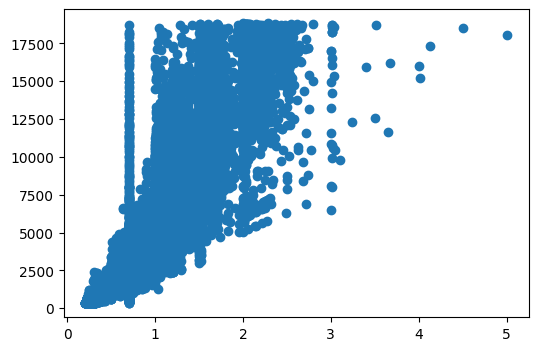

In [29]:
plt.figure(figsize=(6,4))

plt.scatter(df.carat, df.price);

In [30]:
np.corrcoef(df.carat, df.price)[0][1]

np.float64(0.9164989435440221)

### Cut (огранка алмаза)

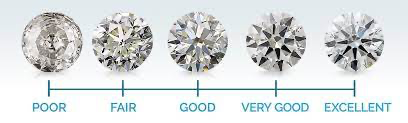

In [31]:
df['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [32]:
df['cut'] = df['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipykernel_6297/1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


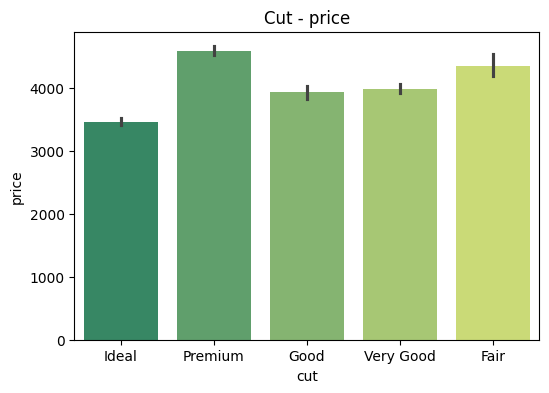

In [33]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [34]:
max_carat_fair = df[df['cut'] == 'Fair']['carat'].max()
print('max carat fair = ', max_carat_fair)

max carat fair =  5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [35]:
df.groupby('cut')['price'].mean()

cut
Fair         4347.735294
Good         3926.266317
Ideal        3462.593850
Premium      4581.864918
Very Good    3982.162781
Name: price, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [36]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

PriceMean  PriceMedian  CaratMean
cut                                           
Fair       4347.735294       3282.0   1.040094
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331
Premium    4581.864918       3175.0   0.889616
Very Good  3982.162781       2649.0   0.804177

In [37]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

PriceMean  PriceMedian  CaratMean
cut                                           
Premium    4581.864918       3175.0   0.889616
Fair       4347.735294       3282.0   1.040094
Very Good  3982.162781       2649.0   0.804177
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331

## Table and Depth

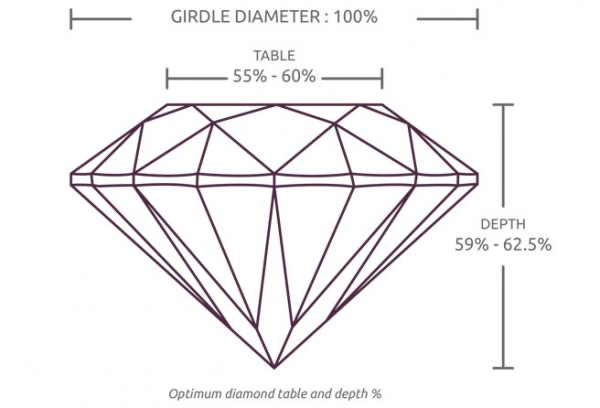

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [38]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [39]:
len(df[ ((df.table >= 55) & (df.table <= 60)) & ((df['depth'] >= 59) & (df['depth'] <= 62.5))]) / len(df)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [40]:

median_price_with_optimal_table = df[((df.table >= 55) & (df.table <= 60))]['price'].median() 
median_price_with_optimal_depth = df[(df['depth'] >= 59) & (df['depth'] <= 62.5)]['price'].median()
res = 'С оптимальным talbe' if median_price_with_optimal_table > median_price_with_optimal_depth else 'С оптимальным depth'
print(res)


С оптимальным talbe


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [41]:
np.corrcoef(df.table, df.price)[0][1]

np.float64(0.12662153885758198)

In [42]:
np.corrcoef(df.depth, df.price)[0][1]

np.float64(-0.010831614226837217)

## Clarity - прозрачность алмаза

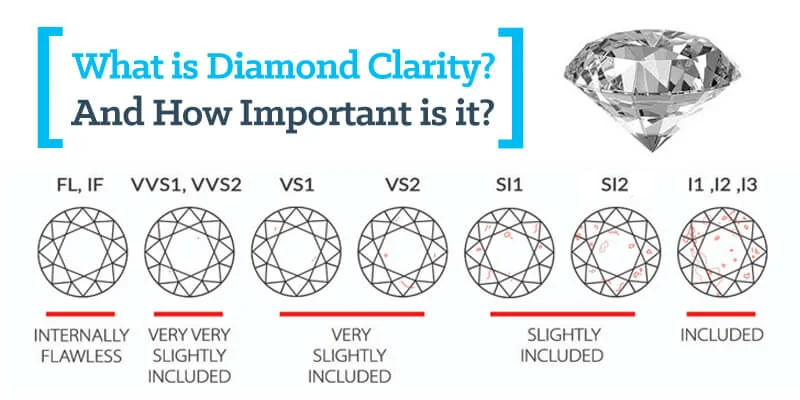

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [43]:
len(df['clarity'].unique())

8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [44]:
((df['clarity'] == 'VVS1') | (df['clarity'] == 'VVS2')).sum()

np.int64(8704)

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

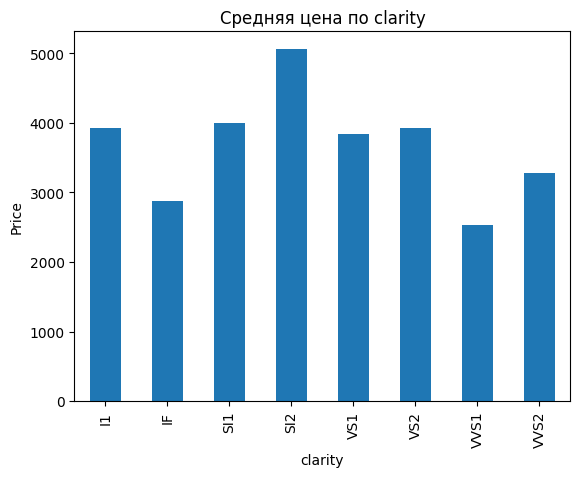

In [45]:
df.groupby('clarity')['price'].mean().plot(kind='bar')
plt.title('Средняя цена по clarity')
plt.ylabel('Price')
plt.show()


Самые дорогие - SI2

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [46]:
res = df.groupby(['cut', 'clarity'])['price'].agg(
    mean_price='mean',
    median_price='median'
)


res_sorted = res.groupby(level=0, group_keys=False).apply(lambda g: g.sort_values('mean_price', ascending=False))

# Отсортированный датасет по средней цене, для кажой пары (cut, clarity)
print(res_sorted)
print('Алмазы с наибольшей средней ценой имеют огранку и чистоту:', res['mean_price'].idxmax())


                    mean_price  median_price
cut       clarity                           
Fair      SI2      5145.740175        3681.0
          SI1      4201.818182        3511.0
          VS2      4189.217054        3202.5
          VS1      4165.141176        2829.5
          VVS1     3871.352941        2797.0
          I1       3703.533333        2397.0
          VVS2     3349.768116        2484.0
          IF       1912.333333        1849.0
Good      SI2      4544.119816        3763.0
          VS2      4280.315631        3220.5
          IF       4141.931507        1806.0
          VS1      3799.741248        2427.0
          SI1      3688.387015        2723.0
          I1       3601.810526        3127.0
          VVS2     3118.108108        1866.5
          VVS1     2272.391534         977.0
Ideal     SI2      4761.711917        4068.0
          I1       4335.726027        3673.5
          SI1      3755.110434        2537.0
          VS1      3490.985179        1815.0
          

## Pandas profiling

In [47]:
from ydata_profiling import ProfileReport

In [48]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [49]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 47.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

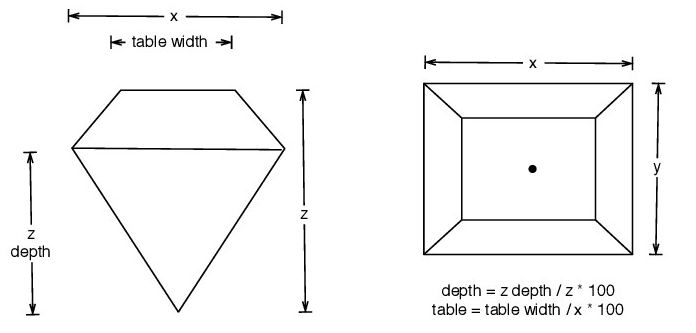

In [51]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [52]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [53]:
xyz_median = df[['x', 'y', 'z']].median()
print(xyz_median)
print('Максимальное значение: ', xyz_median.idxmax(),"=", xyz_median.max(), )

x    5.70
y    5.71
z    3.53
dtype: float64
Максимальное значение:  y = 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [54]:
np.min(df['x']), np.min(df['y']), np.min(df['z'])

(np.float64(0.0), np.float64(0.0), np.float64(0.0))

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [55]:
xyz_zero = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

print(xyz_zero)
print('Колличество сторк: ', len(xyz_zero))

       carat        cut color clarity  depth  table    price     x     y    z
2201    1.00    Premium     G     SI2   59.1   59.0   3142.0  6.55  6.48  0.0
2308    1.01    Premium     H      I1   58.1   59.0   3167.0  6.66  6.60  0.0
4779    1.10    Premium     G     SI2   63.0   59.0   3696.0  6.50  6.47  0.0
5458    1.01    Premium     F     SI2   59.2   58.0   3837.0  6.50  6.47  0.0
10146   1.50       Good     G      I1   64.0   61.0   4731.0  7.15  7.04  0.0
11158   1.07      Ideal     F     SI2   61.6   56.0   4954.0  0.00  6.62  0.0
11937   1.00  Very Good     H     VS2   63.3   53.0   5139.0  0.00  0.00  0.0
13572   1.15      Ideal     G     VS2   59.2   56.0   5564.0  6.88  6.83  0.0
15916   1.14       Fair     G     VS1   57.5   67.0   6381.0  0.00  0.00  0.0
24342   2.18    Premium     H     SI2   59.4   61.0  12631.0  8.49  8.45  0.0
24468   1.56      Ideal     G     VS2   62.2   54.0  12800.0  0.00  0.00  0.0
26067   2.25    Premium     I     SI1   61.3   58.0  15397.0  8.

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [56]:
df = df.drop(xyz_zero.index)
print('Осталось: ', len(df))

Осталось:  53786


### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [57]:
df[df.select_dtypes(include='number').columns].corrwith(df['price'])

carat    0.916492
depth   -0.010928
table    0.126722
price    1.000000
x        0.887183
y        0.867665
z        0.868089
dtype: float64

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

Text(0, 0.5, 'Price')

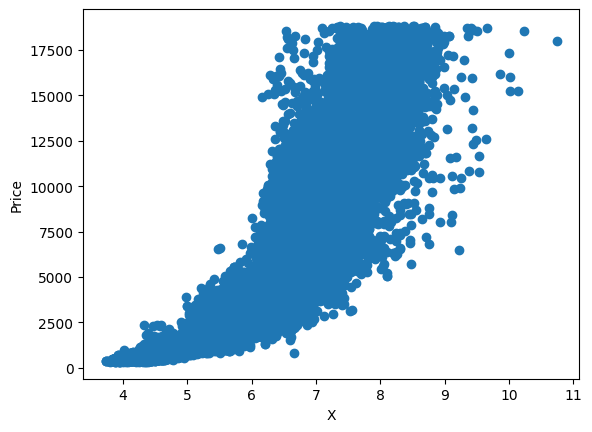

In [58]:
plt.scatter(df['x'], df['price'])
plt.xlabel('X')
plt.ylabel('Price')

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [59]:
mean_x = df['x'].mean()
mean_y = df['y'].mean()
print('percent: ', (len(df[(df['x'] > mean_x) & (df['y'] > mean_y)]) / len(df)) * 100)

percent:  47.3784999814078


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [60]:
median_z = df['z'].median()
round(((df['carat'] > 1.0) & (df['z'] < median_z)).sum() / (df['carat'] > 1.0).sum(), 4)


np.float64(0.0002)

## 2) Color

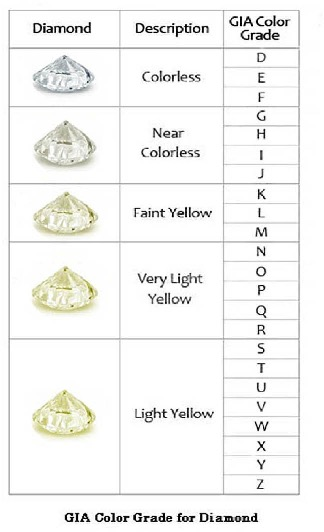

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [61]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Colorless, Near Colorless

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

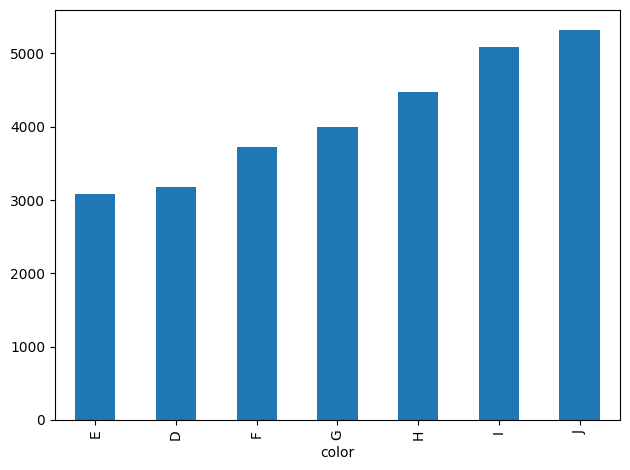

In [62]:

ax = df.groupby('color')['price'].mean().sort_values(ascending=True).plot(kind='bar')
for lbl in ax.get_xticklabels():
    lbl.set_rotation(90)

plt.tight_layout()
plt.show()

Дороже алмазы цвета J (Почти безцветные)

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [63]:
df.groupby('color')[['price', 'carat']].agg({
    'price': 'median',
    'carat': 'median'
}).sort_values('price', ascending=False)


price  carat
color               
J      4234.5   1.11
I      3721.5   1.00
H      3449.5   0.90
F      2345.0   0.70
G      2242.0   0.70
D      1842.0   0.54
E      1741.0   0.54

Да, Медианные кратаы умешьшаются вместе со стоимостью

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [64]:
print(df.groupby(['cut', 'color', 'clarity'])['price'].mean().sort_values(ascending=False))
print('\nСамые дорогие: ', end='')
print(*df.groupby(['cut', 'color', 'clarity'])['price'].mean().idxmax(), sep=',')

cut        color  clarity
Very Good  D      IF         10298.260870
Good       D      IF         10030.333333
Ideal      J      I1          9454.000000
Premium    D      IF          9056.500000
           J      SI2         7550.285714
                                 ...     
Good       E      IF          1519.222222
Ideal      I      IF          1509.404255
Fair       G      IF          1488.000000
Premium    H      VVS1        1453.758929
Very Good  J      IF          1074.125000
Name: price, Length: 276, dtype: float64

Самые дорогие: Very Good,D,IF


# Практика 
### One-hot encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

df_encoded = df.copy()
cut_map = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_encoded['cut_encoded'] = df_encoded['cut'].map(cut_map)
df_encoded['clarity_encoded'] = df_encoded['clarity'].map(clarity_map)
color_col = df[['color']]

In [66]:
enc = OneHotEncoder(sparse_output=False)
encoded_array = enc.fit_transform(color_col)

df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_array, columns=enc.get_feature_names_out(['color']), index=df.index)], axis=1)
df_encoded = df_encoded.drop(['cut', 'clarity', 'color'], axis=1)

### Матрица корреляций, хитмап

In [67]:
corr = df_encoded.corr()
corr

carat     depth     table     price         x         y  \
carat            1.000000  0.028384  0.180016  0.916492  0.972709  0.948870   
depth            0.028384  1.000000 -0.294247 -0.010928 -0.024345 -0.026725   
table            0.180016 -0.294247  1.000000  0.126722  0.195467  0.183742   
price            0.916492 -0.010928  0.126722  1.000000  0.887183  0.867665   
x                0.972709 -0.024345  0.195467  0.887183  1.000000  0.974774   
y                0.948870 -0.026725  0.183742  0.867665  0.974774  1.000000   
z                0.955969  0.094473  0.151712  0.868089  0.975395  0.956581   
cut_encoded     -0.132324 -0.215091 -0.432445 -0.052539 -0.124843 -0.120769   
clarity_encoded  0.340676  0.066041  0.156773  0.137791  0.361829  0.348146   
color_D         -0.110872 -0.014861 -0.008523 -0.072195 -0.105822 -0.103667   
color_E         -0.138693 -0.029379  0.007222 -0.100770 -0.134817 -0.130640   
color_F         -0.059177 -0.017546 -0.004808 -0.023869 -0.047602 -0.046498   
color_G         -0.029116  0.004023 -0.039104  0.008736 -0.024547 -0.024382   
color_H          0.101529  0.025613  0.011610  0.058500  0.095938  0.093566   
color_I          0.159167  0.023895  0.017560  0.096487  0.145826  0.142222   
color_J          0.180763  0.022006  0.037408  0.082013  0.165393  0.161461   

                        z  cut_encoded  clarity_encoded   color_D   color_E  \
carat            0.955969    -0.132324         0.340676 -0.110872 -0.138693   
depth            0.094473    -0.215091         0.066041 -0.014861 -0.029379   
table            0.151712    -0.432445         0.156773 -0.008523  0.007222   
price            0.868089    -0.052539         0.137791 -0.072195 -0.100770   
x                0.975395    -0.124843         0.361829 -0.105822 -0.134817   
y                0.956581    -0.120769         0.348146 -0.103667 -0.130640   
z                1.000000    -0.149079         0.359300 -0.105760 -0.133819   
cut_encoded     -0.149079     1.000000        -0.182194  0.007679 -0.003926   
clarity_encoded  0.359300    -0.182194         1.000000  0.076906  0.020277   
color_D         -0.105760     0.007679         0.076906  1.000000 -0.178629   
color_E         -0.133819    -0.003926         0.020277 -0.178629  1.000000   
color_F         -0.048874    -0.007303        -0.022568 -0.175731 -0.218555   
color_G         -0.023599     0.039937        -0.130096 -0.194969 -0.242480   
color_H          0.096051    -0.010634         0.035714 -0.161544 -0.200911   
color_I          0.144964    -0.008728         0.021798 -0.126711 -0.157589   
color_J          0.165001    -0.036131         0.039561 -0.088846 -0.110497   

                  color_F   color_G   color_H   color_I   color_J  
carat           -0.059177 -0.029116  0.101529  0.159167  0.180763  
depth           -0.017546  0.004023  0.025613  0.023895  0.022006  
table           -0.004808 -0.039104  0.011610  0.017560  0.037408  
price           -0.023869  0.008736  0.058500  0.096487  0.082013  
x               -0.047602 -0.024547  0.095938  0.145826  0.165393  
y               -0.046498 -0.024382  0.093566  0.142222  0.161461  
z               -0.048874 -0.023599  0.096051  0.144964  0.165001  
cut_encoded     -0.007303  0.039937 -0.010634 -0.008728 -0.036131  
clarity_encoded -0.022568 -0.130096  0.035714  0.021798  0.039561  
color_D         -0.175731 -0.194969 -0.161544 -0.126711 -0.088846  
color_E         -0.218555 -0.242480 -0.200911 -0.157589 -0.110497  
color_F          1.000000 -0.238546 -0.197651 -0.155032 -0.108704  
color_G         -0.238546  1.000000 -0.219288 -0.172004 -0.120604  
color_H         -0.197651 -0.219288  1.000000 -0.142516 -0.099928  
color_I         -0.155032 -0.172004 -0.142516  1.000000 -0.078381  
color_J         -0.108704 -0.120604 -0.099928 -0.078381  1.000000

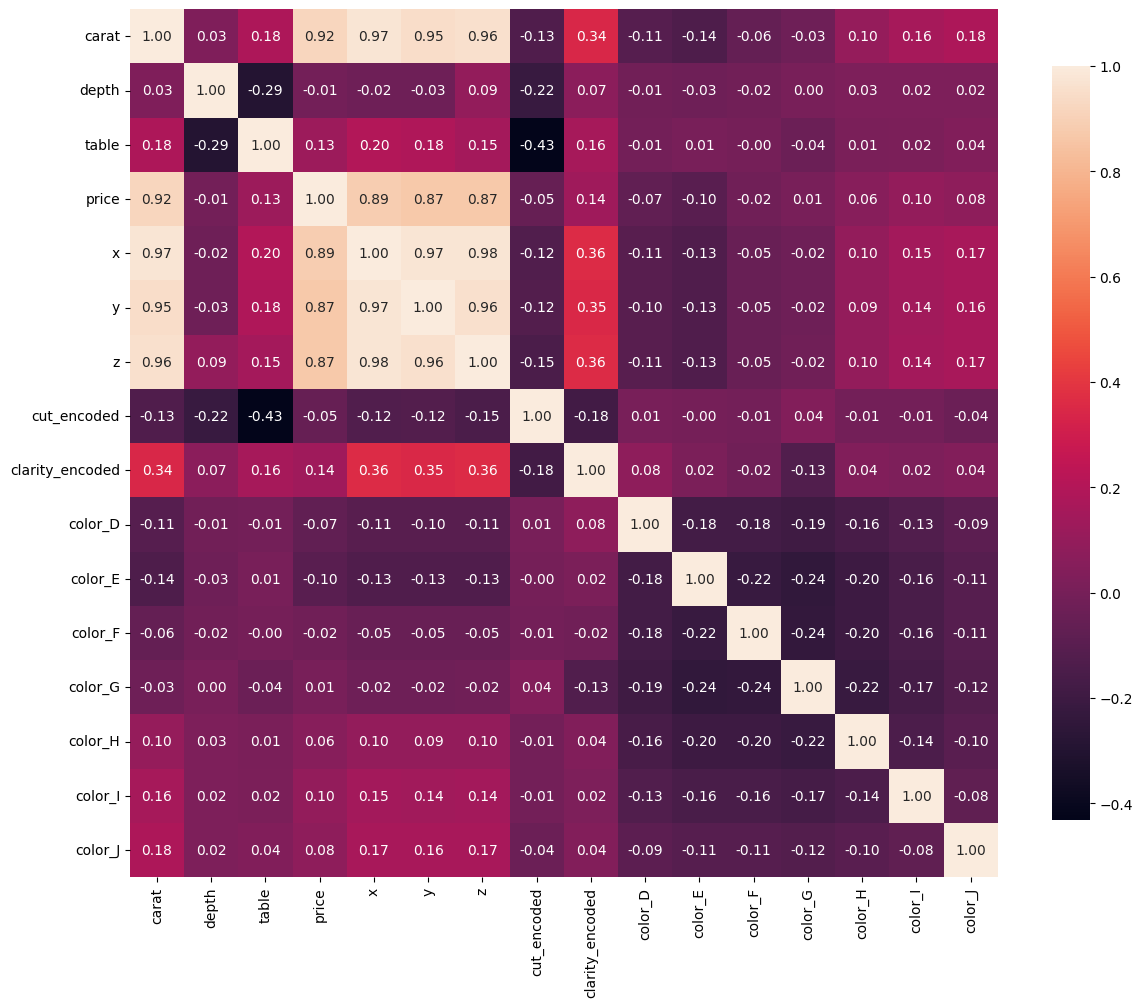

In [68]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.show()

### Feature Importance (Linear Regression, GradientBoosting, RandomForest

In [81]:
features = df_encoded.drop('price', axis=1)
target = df_encoded['price']

In [89]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(features, target)

features_importances = pd.DataFrame({
    'feature': features.columns,
    'importance': random_forest.feature_importances_
}).sort_values(by='importance', ascending=False)
features_importances


feature  importance
4                 y    0.865788
7   clarity_encoded    0.062787
0             carat    0.015155
14          color_J    0.010925
3                 x    0.009840
13          color_I    0.007836
5                 z    0.006533
12          color_H    0.005554
1             depth    0.003090
8           color_D    0.002785
11          color_G    0.002441
2             table    0.002305
9           color_E    0.001788
10          color_F    0.001596
6       cut_encoded    0.001578

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

linear_reg = LinearRegression()
linear_reg.fit(features_scaled, target)

feat_importances = pd.DataFrame({
    'feature': features.columns,
    'importance': linear_reg.coef_.ravel()
}).sort_values(by='importance', ascending=False)
feat_importances

feature   importance
0             carat  4185.283453
8           color_D   205.471146
9           color_E   157.914145
6       cut_encoded   135.047421
10          color_F   114.216658
4                 y    89.921587
11          color_G    41.530599
5                 z   -33.298311
2             table   -49.894303
1             depth   -66.645380
3                 x  -121.762101
12          color_H  -123.086755
13          color_I  -220.146117
14          color_J  -354.926889
7   clarity_encoded  -802.738595

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state=42)
grad_boost.fit(features, target)

feat_importances = pd.DataFrame({
    'feature': features.columns,
    'importance': grad_boost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

feature  importance
4                 y    0.800096
5                 z    0.097278
7   clarity_encoded    0.060202
3                 x    0.011108
14          color_J    0.009160
0             carat    0.008605
13          color_I    0.005610
8           color_D    0.002046
10          color_F    0.001777
12          color_H    0.001547
9           color_E    0.001260
11          color_G    0.000665
6       cut_encoded    0.000368
1             depth    0.000246
2             table    0.000031

### Permutation importance

In [ ]:
from sklearn.inspection import permutation_importance

X = features
y = target

models = {
    'GradientBoosting': (grad_boost, X),
    'LinearRegression': (linear_reg, features_scaled),
    'RandomForest': (random_forest, X),
}

perm_results = {}

for name, (model, X_used) in models.items():
    r = permutation_importance(
        model,
        X_used,
        y,
        n_repeats=10,
        random_state=42,
        n_jobs=-1,
    )

    perm_df = (
        pd.DataFrame({
            'feature': features.columns,
            'importance_mean': r.importances_mean,
            'importance_std': r.importances_std,
        })
        .sort_values('importance_mean', ascending=False)
        .reset_index(drop=True)
    )

    perm_results[name] = perm_df

perm_results['GradientBoosting'].head()
perm_results['LinearRegression'].head()
perm_results['RandomForest'].head()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- carat
- clarity_encoded
- color_D
- color_E
- color_F
- ...
Feature names seen at fit time, yet now missing:
- price


### Обучение моделей

In [ ]:
from sklearn.model_selection import train_test_split
features = df_encoded.drop('price', axis=1)
target = df_encoded['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
target_train_binned = pd.qcut(target_train, q=5, labels=False)

       carat  depth  table     x     y     z  cut_encoded  clarity_encoded  \
0       0.23   61.5   55.0  3.95  3.98  2.43            4                6   
1       0.21   59.8   61.0  3.89  3.84  2.31            3                5   
2       0.23   56.9   65.0  4.05  4.07  2.31            1                3   
3       0.29   62.4   58.0  4.20  4.23  2.63            3                4   
4       0.31   63.3   58.0  4.34  4.35  2.75            1                6   
...      ...    ...    ...   ...   ...   ...          ...              ...   
53800   0.72   60.8   57.0  5.75  5.76  3.50            4                5   
53801   0.72   63.1   55.0  5.69  5.75  3.61            1                5   
53802   0.70   62.8   60.0  5.66  5.68  3.56            2                5   
53803   0.86   61.0   58.0  6.15  6.12  3.74            3                6   
53804   0.75   62.2   55.0  5.83  5.87  3.64            4                6   

       color_D  color_E  color_F  color_G  color_H  color_I  co

In [79]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(features_train, target_train)

linear_reg = LinearRegression()
linear_reg.fit(features_train, target_train)

grad_boost = GradientBoostingRegressor()
grad_boost.fit(features_train, target_train)


GradientBoostingRegressor()

### Сравнение моделей

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'RandomForest': random_forest,
    'LinearRegression': linear_reg,
    'GradientBoosting': grad_boost,
}

results = []

for name, model in models.items():
    y_pred = model.predict(features_test)

    results.append({
        'model': name,
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred)),
        'MAE': mean_absolute_error(target_test, y_pred),
        'R2': r2_score(target_test, y_pred),
    })

metrics_df = pd.DataFrame(results).sort_values('RMSE')
print(metrics_df)


              model         RMSE         MAE        R2
0      RandomForest   569.108278  276.839258  0.979622
2  GradientBoosting   684.400128  377.694989  0.970530
1  LinearRegression  1321.379717  861.458939  0.890145
